In [1]:
# 자동 미분
# 파이토치는 Tensor 를 바로 이용

In [2]:
import torch
from matplotlib import pyplot as plt

# 일변수 데이터 생성(2차원)
x = torch.FloatTensor(range(5)).unsqueeze(1)
# torch.FloatTensor(range(5)) : 리스트 range(5)를 이용해 텐서 생성(원래 크기 1차원; torch.Size(5))
# -> unsqueeze(1) 는 1번째 위치의 차원 늘려준다 -> 최종 x 크기 : torch.Size(5, 1)

y = 2 * x + torch.rand(5, 1) # 임의의 실제값 5개

num_features = x.shape[1] # 변수의 개수 저장용 변수
# x의 크기는 torch.Size([5, 1]) 이므로 인스턴수의 개수가 5개이고 변수(피쳐)의 개수가 1개인 데이터
# x.shape[1]은 변수의 크기가 된다

In [3]:
# 선형식 y = xw + b 로 표현됨 -> w 는 5x1 데이터와 곱할 수 있어야 하며 예측값이 하나여야 한다
# w : 크기가 1(피쳐수) x 1(출력값 크기) 인 배열로 정의 
# wx = 5 x 1 이 된다
w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True) # 편향 b : 모든 인스턴스에 동일한 숫자를 더해주는 것 ; 크기 1인 텐서로 정의

# 목표 : xw + b 가 잘 예측 할수 있는 식이 되도록 하는 w 와 b를 찾는 것
# 모르는 경우 무작위값 -> torch.randn 이용
# x, y : 데이터 ; 변하지 않는 값, w, b : 역전파를 통해 최적화값 찾음 -> requires_grad=True 로 활성화 

In [4]:
# torch.optim.SGD 내부에 변수를 리스트로 무꺼 주고 적절한 학습률(learning rate)을 정하여 자동으로 가중치 및 편향을 업데이트
learning_rate = 1e-3
optimizer = torch.optim.SGD([w, b], lr=learning_rate)

In [5]:
loss_stack = [] # 매 에폭(epoch) 마다 손실 함수값 저장하기 위한 빈 리스트

for epoch in range(1001): # 학습 반복수
    optimizer.zero_grad() # 최적화는 계산을 누적시키기 때문에 매 에폭마다 누적된 값을 optimizer.zero_grad() 로 초기화
    y_hat = torch.matmul(x, w) + b # 회귀식 모델 이용 예측값 산출
    loss = torch.mean((y_hat - y) ** 2) # 예측값과 실제값을 이용하여 손실 함수 계산 ; Mean Square Error(MSE) 함수 사용
    loss.backward() # 역전파의 기준을 손실 함수로 정한다
    optimizer.step() # 미리 정의한 optimizer를 이용하여 최적화 시행
    loss_stack.append(loss.item()) # 그래프를 그리기 위해 손실 함수값만 loss_stack 에 넣는다. item()을 사용하지 않으면 loss 텐서 전체를 저장

    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}') # 에폭이 100 으로 나눠 떨어질때마다 손실 함수값 출력

Epoch 0:32.33287811279297
Epoch 100:2.8052377700805664
Epoch 200:0.7629342675209045
Epoch 300:0.57634037733078
Epoch 400:0.5201510787010193
Epoch 500:0.4776475429534912
Epoch 600:0.4404233992099762
Epoch 700:0.4074229300022125
Epoch 800:0.3781389594078064
Epoch 900:0.35215112566947937
Epoch 1000:0.3290881812572479


In [6]:
with torch.no_grad():
    y_hat = torch.matmul(x, w) + b # 최종 학습된 w, b 로 예측값 산출
# 최적화를 사용하지 않으므로 requires_grad를 비활성화. 이 때 with torch.no_grad() 를 이용하여 구문 내부에 있는 requires_grad 가 작동하지 않게 가능

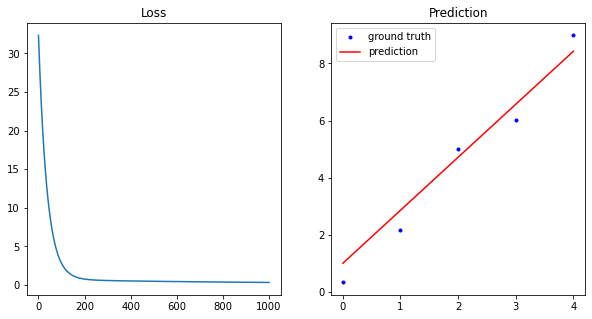

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth', 'prediction'])
plt.title("Prediction")
plt.show()